In [ ]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from datetime import datetime
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/REGex/Garbage Classification/'

In [ ]:
train_dir = data_dir + 'TRAIN'
test_dir = data_dir + 'TEST'
# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
batch_size = 32
num_epochs = 32
num_classes = 6  #categories of trash

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
                 rescale=1.0/255, 
                 shear_range = 0.2, 
                 zoom_range = 0.2, horizontal_flip=True,
                 rotation_range=30, validation_split=0.2,
                 width_shift_range=0.2, 
                 height_shift_range=0.2)

test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_data = train_data_gen.flow_from_directory(
             train_dir, 
             target_size = (img_width, img_height), 
             batch_size = batch_size, 
             class_mode = 'categorical',
             subset = 'training')

valid_data = train_data_gen.flow_from_directory(
             train_dir, 
             target_size = (img_width, img_height), 
             batch_size = batch_size, 
             class_mode = 'categorical',
             subset = 'validation')

test_data = test_data_gen.flow_from_directory(
            test_dir, 
            target_size = (img_width, img_height), 
            batch_size = batch_size, 
            class_mode = 'categorical')

Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_data.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [ ]:
train_data.image_shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg19 = VGG19(input_shape = (img_width , img_height, 3), weights = 'imagenet', include_top = False)
for layer in vgg19.layers:
  layer.trainable = False

In [ ]:
x = layers.Flatten()(vgg19.output)
# now let's add output layers or prediction layer

prediction = layers.Dense(units = num_classes, activation = 'softmax')(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])

result = model.fit(
    train_data, 
    validation_data=valid_data, 
    epochs = num_epochs, 
    steps_per_epoch=len(train_data))

Epoch 1/32
51/51 [==============================] - 453s 8s/step - loss: 1.5468 - accuracy: 0.4379 - val_loss: 1.1716 - val_accuracy: 0.5829
Epoch 2/32
51/51 [==============================] - 38s 753ms/step - loss: 1.0293 - accuracy: 0.6082 - val_loss: 1.3145 - val_accuracy: 0.5176
Epoch 3/32
51/51 [==============================] - 39s 760ms/step - loss: 1.0216 - accuracy: 0.6151 - val_loss: 0.9691 - val_accuracy: 0.6256
Epoch 4/32
51/51 [==============================] - 38s 746ms/step - loss: 0.8893 - accuracy: 0.6613 - val_loss: 0.9499 - val_accuracy: 0.6658
Epoch 5/32
51/51 [==============================] - 36s 710ms/step - loss: 0.7980 - accuracy: 0.6912 - val_loss: 0.9385 - val_accuracy: 0.6583
Epoch 6/32
51/51 [==============================] - 36s 708ms/step - loss: 0.7679 - accuracy: 0.7093 - val_loss: 0.9356 - val_accuracy: 0.6658
Epoch 7/32
51/51 [==============================] - 36s 702ms/step - loss: 0.7484 - accuracy: 0.7105 - val_loss: 0.9767 - val_accuracy: 0.6658
E

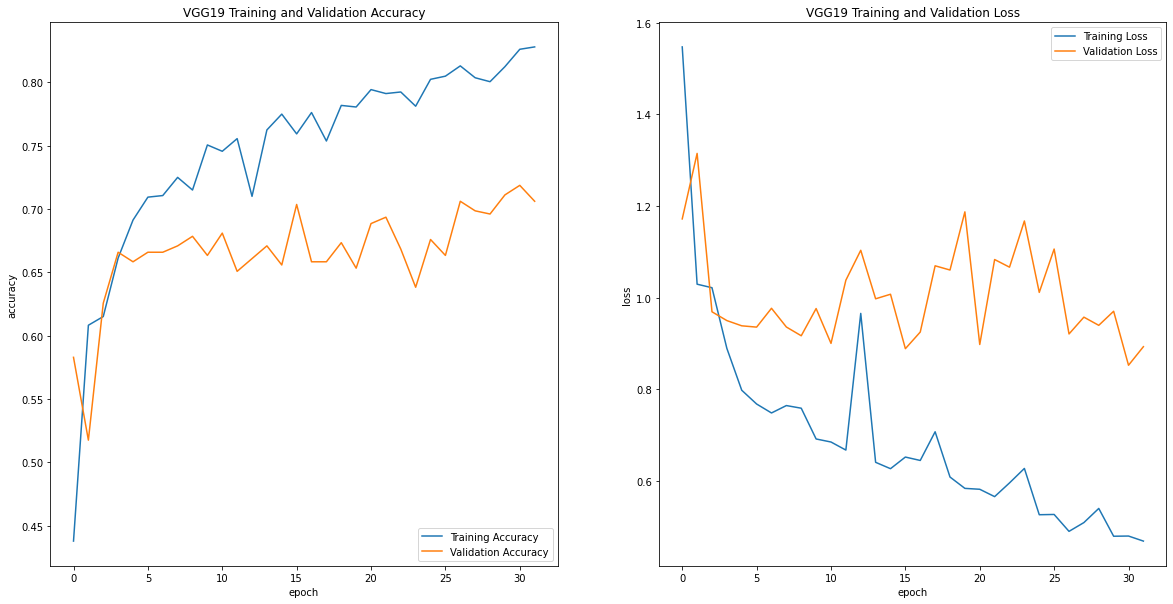

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.title('VGG19 Training and Validation Accuracy')
plt.plot(result.history['accuracy'], label = 'Training Accuracy')
plt.plot(result.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot(result.history["loss"], label = 'Training Loss')
plt.plot(result.history["val_loss"], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('VGG19 Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('vgg19.h5')